<a href="https://colab.research.google.com/github/mariatomy9/Major-Project/blob/hisana/Epilepsy_prediction_system_Parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
epilepsy_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_epil.csv')

In [ ]:
# printing the first 5 rows of the dataframe
epilepsy_data.head()

,Unnamed: 0,PFD(){}_0,PFD(){}_1,PFD(){}_2,PFD(){}_3,PFD(){}_4,PFD(){}_5,PFD(){}_6,PFD(){}_7,PFD(){}_8,...,hjorthActivity(){}_14,hjorthActivity(){}_15,hjorthActivity(){}_16,hjorthActivity(){}_17,hjorthActivity(){}_18,hjorthActivity(){}_19,hjorthActivity(){}_20,hjorthActivity(){}_21,hjorthActivity(){}_22,Label
0,0,1.026628,1.026628,1.026114,1.026628,1.026628,1.024564,1.025340,1.024045,1.026628,...,0.465618,0.427841,1.078657,0.102130,0.267037,0.330682,0.287038,0.236045,0.219049,0
1,1,1.026628,1.026628,1.026628,1.026628,1.026886,1.026114,1.025081,1.024823,1.026628,...,0.310774,0.304385,0.948840,0.092594,0.223569,0.242099,0.359904,0.224586,0.241306,0
2,2,1.026628,1.026628,1.025598,1.026628,1.027142,1.026114,1.025081,1.027142,1.026628,...,0.329698,0.342481,1.094572,0.082353,0.207086,0.195659,0.304122,0.247518,0.245281,0
3,3,1.026628,1.026628,1.024823,1.026628,1.026886,1.025598,1.023006,1.025081,1.025856,...,3.803939,1.429145,1.223469,0.141066,0.582976,0.190388,0.458770,0.199284,0.329741,0
4,4,1.026628,1.026628,1.023526,1.026628,1.026114,1.026114,1.025598,1.024564,1.027142,...,4.826091,1.286788,1.074185,0.146749,1.779844,0.390236,0.327588,0.293795,1.008775,0


In [ ]:
# number of rows and columns in the dataframe
epilepsy_data.shape

(12699, 49)

In [ ]:
# getting more information about the dataset
epilepsy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12699 entries, 0 to 12698
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12699 non-null  int64  
 1   PFD(){}_0              12699 non-null  float64
 2   PFD(){}_1              12699 non-null  float64
 3   PFD(){}_2              12699 non-null  float64
 4   PFD(){}_3              12699 non-null  float64
 5   PFD(){}_4              12699 non-null  float64
 6   PFD(){}_5              12699 non-null  float64
 7   PFD(){}_6              12699 non-null  float64
 8   PFD(){}_7              12699 non-null  float64
 9   PFD(){}_8              12699 non-null  float64
 10  PFD(){}_9              12699 non-null  float64
 11  PFD(){}_10             12699 non-null  float64
 12  PFD(){}_11             12699 non-null  float64
 13  PFD(){}_12             12699 non-null  float64
 14  PFD(){}_13             12699 non-null  float64
 15  PF

In [ ]:
# checking for missing values in each column
epilepsy_data.isnull().sum()

Unnamed: 0               0
PFD(){}_0                0
PFD(){}_1                0
PFD(){}_2                0
PFD(){}_3                0
PFD(){}_4                0
PFD(){}_5                0
PFD(){}_6                0
PFD(){}_7                0
PFD(){}_8                0
PFD(){}_9                0
PFD(){}_10               0
PFD(){}_11               0
PFD(){}_12               0
PFD(){}_13               0
PFD(){}_14               0
PFD(){}_15               0
PFD(){}_16               0
PFD(){}_17               0
PFD(){}_18               0
PFD(){}_19               0
PFD(){}_20               0
PFD(){}_21               0
PFD(){}_22               0
DTW((0, 1),){}           0
hjorthActivity(){}_0     0
hjorthActivity(){}_1     0
hjorthActivity(){}_2     0
hjorthActivity(){}_3     0
hjorthActivity(){}_4     0
hjorthActivity(){}_5     0
hjorthActivity(){}_6     0
hjorthActivity(){}_7     0
hjorthActivity(){}_8     0
hjorthActivity(){}_9     0
hjorthActivity(){}_10    0
hjorthActivity(){}_11    0
h

In [ ]:
# getting some statistical measures about the data
epilepsy_data.describe()

,Unnamed: 0,PFD(){}_0,PFD(){}_1,PFD(){}_2,PFD(){}_3,PFD(){}_4,PFD(){}_5,PFD(){}_6,PFD(){}_7,PFD(){}_8,...,hjorthActivity(){}_14,hjorthActivity(){}_15,hjorthActivity(){}_16,hjorthActivity(){}_17,hjorthActivity(){}_18,hjorthActivity(){}_19,hjorthActivity(){}_20,hjorthActivity(){}_21,hjorthActivity(){}_22,Label
count,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,...,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000,12699.000000
mean,2065.601622,1.024217,1.025449,1.024611,1.025228,1.024593,1.024197,1.024606,1.025140,1.024737,...,0.861601,0.913711,0.872874,0.976057,0.968966,0.862775,1.000395,0.810612,0.962737,4.092369
std,2024.912589,0.003335,0.002123,0.003005,0.002613,0.003263,0.003184,0.002657,0.001994,0.002876,...,10.795094,1.709690,8.739974,16.577027,10.334128,7.582906,18.465899,13.519443,12.157763,1.999777
min,0.000000,1.001966,1.003083,1.002804,1.002804,1.001405,1.002245,1.002245,1.002525,1.002245,...,0.003010,0.004608,0.000112,0.003832,0.002241,0.000450,0.000635,0.000686,0.000464,0.000000
25%,615.000000,1.022746,1.024823,1.023786,1.024564,1.023526,1.022224,1.023006,1.024045,1.023786,...,0.100489,0.259995,0.076285,0.075466,0.242267,0.270931,0.132490,0.042358,0.086096,2.000000
50%,1217.000000,1.025598,1.026114,1.025598,1.026628,1.026371,1.025340,1.025598,1.025856,1.025598,...,0.280677,0.726048,0.262125,0.516428,0.543534,0.486271,0.375737,0.329504,0.287960,5.000000
75%,3038.500000,1.026628,1.026628,1.026628,1.026628,1.026628,1.026628,1.026628,1.026628,1.026628,...,0.597844,1.007272,0.829225,0.910670,0.853424,0.737272,0.629639,0.639546,0.977758,6.000000
max,8004.000000,1.032991,1.031476,1.031982,1.032487,1.031476,1.031476,1.032739,1.030716,1.031476,...,742.738824,104.208060,700.341923,1590.851772,1002.847564,521.547086,1687.046575,1162.132798,824.194088,6.000000


Implementation

In [ ]:
from __future__ import print_function
import os
import time
import random
import glob
import librosa
import numpy as np
import librosa.display
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
import seaborn as sn
import pandas as pd

In [ ]:
import keras
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import  ModelCheckpoint
from tensorflow.keras.models import Model, load_model
from keras.layers.core import Dense, Activation
from keras.layers.core import Dropout
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [ ]:

#epilepsy_data =epilepsy_data.drop(['Unnamed: 0'],axis=1)
epilepsy_data

,Unnamed: 0,PFD(){}_0,PFD(){}_1,PFD(){}_2,PFD(){}_3,PFD(){}_4,PFD(){}_5,PFD(){}_6,PFD(){}_7,PFD(){}_8,...,hjorthActivity(){}_14,hjorthActivity(){}_15,hjorthActivity(){}_16,hjorthActivity(){}_17,hjorthActivity(){}_18,hjorthActivity(){}_19,hjorthActivity(){}_20,hjorthActivity(){}_21,hjorthActivity(){}_22,Label
0,0,1.026628,1.026628,1.026114,1.026628,1.026628,1.024564,1.025340,1.024045,1.026628,...,0.465618,0.427841,1.078657,0.102130,0.267037,0.330682,0.287038,0.236045,0.219049,0
1,1,1.026628,1.026628,1.026628,1.026628,1.026886,1.026114,1.025081,1.024823,1.026628,...,0.310774,0.304385,0.948840,0.092594,0.223569,0.242099,0.359904,0.224586,0.241306,0
2,2,1.026628,1.026628,1.025598,1.026628,1.027142,1.026114,1.025081,1.027142,1.026628,...,0.329698,0.342481,1.094572,0.082353,0.207086,0.195659,0.304122,0.247518,0.245281,0
3,3,1.026628,1.026628,1.024823,1.026628,1.026886,1.025598,1.023006,1.025081,1.025856,...,3.803939,1.429145,1.223469,0.141066,0.582976,0.190388,0.458770,0.199284,0.329741,0
4,4,1.026628,1.026628,1.023526,1.026628,1.026114,1.026114,1.025598,1.024564,1.027142,...,4.826091,1.286788,1.074185,0.146749,1.779844,0.390236,0.327588,0.293795,1.008775,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12694,4843,1.015893,1.024564,1.026628,1.024045,1.026371,1.026628,1.020916,1.026886,1.020391,...,0.446341,0.774349,0.844436,0.799153,0.611870,1.106704,0.374820,0.568831,0.804100,6
12695,4844,1.020916,1.026371,1.026628,1.025081,1.024823,1.026628,1.020391,1.026371,1.017489,...,0.442123,0.688490,0.822147,0.792710,1.072197,1.108208,0.588603,0.584333,0.774103,6
12696,4845,1.019339,1.023786,1.026628,1.024045,1.026114,1.026628,1.023006,1.024823,1.021178,...,0.427248,0.667052,1.593559,0.916766,0.634947,1.190402,9.156488,1.342515,1.213014,6
12697,4846,1.019075,1.026371,1.026886,1.026628,1.026886,1.026628,1.024305,1.028934,1.021178,...,0.423870,0.902538,0.897646,0.921051,1.523667,0.519850,0.648398,3.630889,0.996639,6


<Axes: xlabel='Label', ylabel='count'>

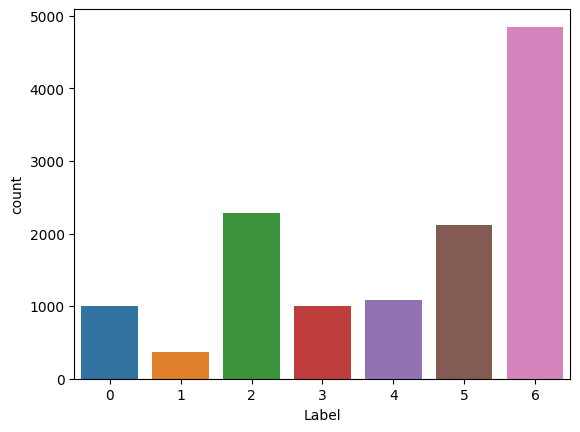

In [ ]:
sn.countplot(x='Label', data=epilepsy_data)

In [ ]:
epilepsy_data.isnull().sum()

Unnamed: 0               0
PFD(){}_0                0
PFD(){}_1                0
PFD(){}_2                0
PFD(){}_3                0
PFD(){}_4                0
PFD(){}_5                0
PFD(){}_6                0
PFD(){}_7                0
PFD(){}_8                0
PFD(){}_9                0
PFD(){}_10               0
PFD(){}_11               0
PFD(){}_12               0
PFD(){}_13               0
PFD(){}_14               0
PFD(){}_15               0
PFD(){}_16               0
PFD(){}_17               0
PFD(){}_18               0
PFD(){}_19               0
PFD(){}_20               0
PFD(){}_21               0
PFD(){}_22               0
DTW((0, 1),){}           0
hjorthActivity(){}_0     0
hjorthActivity(){}_1     0
hjorthActivity(){}_2     0
hjorthActivity(){}_3     0
hjorthActivity(){}_4     0
hjorthActivity(){}_5     0
hjorthActivity(){}_6     0
hjorthActivity(){}_7     0
hjorthActivity(){}_8     0
hjorthActivity(){}_9     0
hjorthActivity(){}_10    0
hjorthActivity(){}_11    0
h

In [ ]:
epilepsy_data.columns

Index(['Unnamed: 0', 'PFD(){}_0', 'PFD(){}_1', 'PFD(){}_2', 'PFD(){}_3',
       'PFD(){}_4', 'PFD(){}_5', 'PFD(){}_6', 'PFD(){}_7', 'PFD(){}_8',
       'PFD(){}_9', 'PFD(){}_10', 'PFD(){}_11', 'PFD(){}_12', 'PFD(){}_13',
       'PFD(){}_14', 'PFD(){}_15', 'PFD(){}_16', 'PFD(){}_17', 'PFD(){}_18',
       'PFD(){}_19', 'PFD(){}_20', 'PFD(){}_21', 'PFD(){}_22',
       'DTW((0, 1),){}', 'hjorthActivity(){}_0', 'hjorthActivity(){}_1',
       'hjorthActivity(){}_2', 'hjorthActivity(){}_3', 'hjorthActivity(){}_4',
       'hjorthActivity(){}_5', 'hjorthActivity(){}_6', 'hjorthActivity(){}_7',
       'hjorthActivity(){}_8', 'hjorthActivity(){}_9', 'hjorthActivity(){}_10',
       'hjorthActivity(){}_11', 'hjorthActivity(){}_12',
       'hjorthActivity(){}_13', 'hjorthActivity(){}_14',
       'hjorthActivity(){}_15', 'hjorthActivity(){}_16',
       'hjorthActivity(){}_17', 'hjorthActivity(){}_18',
       'hjorthActivity(){}_19', 'hjorthActivity(){}_20',
       'hjorthActivity(){}_21', 'hjorthActi

In [ ]:
x=epilepsy_data[['PFD(){}_0', 'PFD(){}_1', 'PFD(){}_2', 'PFD(){}_3', 'PFD(){}_4',
       'PFD(){}_5', 'PFD(){}_6', 'PFD(){}_7', 'PFD(){}_8', 'PFD(){}_9',
       'PFD(){}_10', 'PFD(){}_11', 'PFD(){}_12', 'PFD(){}_13', 'PFD(){}_14',
       'PFD(){}_15', 'PFD(){}_16', 'PFD(){}_17', 'PFD(){}_18', 'PFD(){}_19',
       'PFD(){}_20', 'PFD(){}_21', 'PFD(){}_22', 'DTW((0, 1),){}',
       'hjorthActivity(){}_0', 'hjorthActivity(){}_1', 'hjorthActivity(){}_2',
       'hjorthActivity(){}_3', 'hjorthActivity(){}_4', 'hjorthActivity(){}_5',
       'hjorthActivity(){}_6', 'hjorthActivity(){}_7', 'hjorthActivity(){}_8',
       'hjorthActivity(){}_9', 'hjorthActivity(){}_10',
       'hjorthActivity(){}_11', 'hjorthActivity(){}_12',
       'hjorthActivity(){}_13', 'hjorthActivity(){}_14',
       'hjorthActivity(){}_15', 'hjorthActivity(){}_16',
       'hjorthActivity(){}_17', 'hjorthActivity(){}_18',
       'hjorthActivity(){}_19', 'hjorthActivity(){}_20',
       'hjorthActivity(){}_21', 'hjorthActivity(){}_22']]
x.shape

(12699, 47)

In [ ]:
y = epilepsy_data.loc[:,'Label'].values
y.shape

(12699,)

Model Training

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x)
# x = scaler.transform(x)
# from keras.utils import to_categorical
# y = to_categorical(y)
# y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# x_train = np.reshape(x_train, (x_train.shape[0],x.shape[1]))
# x_test = np.reshape(x_test, (x_test.shape[0],x.shape[1]))

In [ ]:
# y_train = np.reshape(y_train, (y_train.shape[0],y.shape[1]))
# y_test = np.reshape(y_test, (y_test.shape[0],y.shape[1]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(12699, 47) (10159, 47) (2540, 47)


In [ ]:
y_test.shape

(2540,)

In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import Sequential

# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.layers import Embedding
# from tensorflow.keras.layers import GRU,LSTM
# tf.keras.backend.clear_session()

# model = Sequential()
# model.add(LSTM(64, input_shape=(None,47),activation="relu",return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(32,activation="sigmoid"))
# model.add(Dropout(0.2))
# #model.add(LSTM(100,return_sequences=True))
# #model.add(Dropout(0.2))
# #model.add(LSTM(50))
# #model.add(Dropout(0.2))
# model.add(Dense(7, activation='sigmoid'))
# from keras.optimizers import SGD
# model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
# model.summary()

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, validation_data= (x_test, y_test))
score, acc = model.evaluate(x_test, y_test)

TypeError: ignored

Model Evaluation

In [ ]:
# from sklearn.metrics import accuracy_score
# pred = model.predict(x_test)
# predict_classes = np.argmax(pred,axis=1)
# expected_classes = np.argmax(y_test,axis=1)
# print(expected_classes.shape)
# print(predict_classes.shape)
# correct = accuracy_score(expected_classes,predict_classes)
# print(f"Training Accuracy: {correct}")

Accuracy Score

In [ ]:
# accuracy score on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9906486858942809


In [ ]:
# score = model.evaluate(x_test, y_test, verbose=0)
# print("Testing Accuracy: {0:.2%}".format(score[1]))

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(pred,y_test))
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(expected_classes, predict_classes)
# cm

In [ ]:
# import pickle 
# pickle_out = open("classifier.pkl", mode = "wb") 
# pickle.dump(model, pickle_out) 
# pickle_out.close()

1  --> Parkinson's Positive

0 --> Healthy


Building a Predictive System

In [ ]:
input_data = (1.026628492,1.026628492,1.026113658,1.026628492,1.026628492,1.024563855,1.02533975,1.024045472,1.026628492,1.023526192,1.025597943,1.020128691,1.021178207,1.021178207,1.019339112,1.02300601,1.026628492,1.026628492,1.024045472,1.022745579,1.026628492,1.018811556,1.022224036,152.0038579,1.025264976,0.759845903,0.183128998,1.153967963,0.419584096,0.134302621,0.228645503,0.170863757,0.147601768,0.062241007,0.069706451,0.241647033,1.013806055,0.509672013,0.465618441,0.427841446,1.078657497,0.102130334,0.26703667,0.330681914,0.287037865,0.236045474,0.219048731)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
prediction = model.predict(std_data)
print(prediction)

# if (prediction[0] == 0):
#   print("The Person does not have Parkinsons Disease")

# else:
#   print("The Person has Parkinsons")

if (prediction[0] == 0):
  print("dis1 generalized")
elif (prediction[0] == 1):
  print("dis3 generalized")
elif (prediction[0] == 2):
  print(" delta generalized")
elif (prediction[0] == 3):
  print("single burst generalized")
elif (prediction[0] == 4):
  print("temporal")
elif (prediction[0] == 5):
  print("frontocentral")
elif (prediction[0] == 6):
  print("frontopolar")
else:
  print("The Person doesnot have epilepsy")


[0]
dis1 generalized


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'epilepsy_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
epilepsy_model = pickle.load(open('epilepsy_model.sav', 'rb'))

In [ ]:
for column in x.columns:
  print(column)

In [ ]:
pip install jedi

In [ ]:
pip install streamlit -q

In [ ]:
pip install streamlit-option-menu

In [ ]:

%%writefile app.py

# -*- coding: utf-8 -*-

import pickle
import streamlit as st

from streamlit_option_menu import option_menu



# loading the saved models

epilepsy_model = pickle.load(open('/content/epilepsy_model.sav', 'rb'))



# sidebar for navigation
with st.sidebar:
    
    selected = option_menu('Multiple Disease Prediction System',
                          
                          ['Epilepsy Classification',
                            'Disease Classification',
                           'Early Detection',],
                          icons=['activity','heart','person'],
                          default_index=0)
    
    
# Diabetes Prediction Page
if (selected == 'Diabetes Prediction'):
    
    # page title
    st.title('Diabetes Prediction using ML')
    
    
    # getting the input data from the user
    col1, col2, col3 = st.columns(3)
    
    with col1:
        Pregnancies = st.text_input('Number of Pregnancies')
        
    with col2:
        Glucose = st.text_input('Glucose Level')
    
    with col3:
        BloodPressure = st.text_input('Blood Pressure value')
    
    with col1:
        SkinThickness = st.text_input('Skin Thickness value')
    
    with col2:
        Insulin = st.text_input('Insulin Level')
    
    with col3:
        BMI = st.text_input('BMI value')
    
    with col1:
        DiabetesPedigreeFunction = st.text_input('Diabetes Pedigree Function value')
    
    with col2:
        Age = st.text_input('Age of the Person')
    
    
    # code for Prediction
    diab_diagnosis = ''
    
    # creating a button for Prediction
    
    if st.button('Diabetes Test Result'):
        diab_prediction = diabetes_model.predict([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]])
        
        if (diab_prediction[0] == 1):
          diab_diagnosis = 'The person is diabetic'
        else:
          diab_diagnosis = 'The person is not diabetic'
        
    st.success(diab_diagnosis)




# Heart Disease Prediction Page
if (selected == 'Heart Disease Prediction'):
    
    # page title
    st.title('Heart Disease Prediction using ML')
    
    col1, col2, col3 = st.columns(3)
    
    with col1:
        age = st.text_input('Age')
        
    with col2:
        sex = st.text_input('Sex')
        
    with col3:
        cp = st.text_input('Chest Pain types')
        
    with col1:
        trestbps = st.text_input('Resting Blood Pressure')
        
    with col2:
        chol = st.text_input('Serum Cholestoral in mg/dl')
        
    with col3:
        fbs = st.text_input('Fasting Blood Sugar > 120 mg/dl')
        
    with col1:
        restecg = st.text_input('Resting Electrocardiographic results')
        
    with col2:
        thalach = st.text_input('Maximum Heart Rate achieved')
        
    with col3:
        exang = st.text_input('Exercise Induced Angina')
        
    with col1:
        oldpeak = st.text_input('ST depression induced by exercise')
        
    with col2:
        slope = st.text_input('Slope of the peak exercise ST segment')
        
    with col3:
        ca = st.text_input('Major vessels colored by flourosopy')
        
    with col1:
        thal = st.text_input('thal: 0 = normal; 1 = fixed defect; 2 = reversable defect')
        
        
     
     
    # code for Prediction
    heart_diagnosis = ''
    
    # creating a button for Prediction
    
    if st.button('Heart Disease Test Result'):
        heart_prediction = heart_disease_model.predict([[age, sex, cp, trestbps, chol, fbs, restecg,thalach,exang,oldpeak,slope,ca,thal]])                          
        
        if (heart_prediction[0] == 1):
          heart_diagnosis = 'The person is having heart disease'
        else:
          heart_diagnosis = 'The person does not have any heart disease'
        
    st.success(heart_diagnosis)
        
    

# Epilepsy Classification
if (selected == "Epilepsy Classification"):
    
    # page title
    st.title("Epilepsy Classification using Deep Learning")
    
    col1, col2, col3, col4, col5 = st.columns(5)  
    
    with col1:
        PFD0 = st.text_input('PFD0')
        
    with col2:
        PFD1 = st.text_input('PFD1')
        
    with col3:
        PFD2 = st.text_input('PFD2')
        
    with col4:
        PFD3 = st.text_input('PFD3')
        
    with col5:
        PFD4 = st.text_input('PFD4')
        
    with col1:
        PFD5 = st.text_input('PFD5')
        
    with col2:
        PFD6 = st.text_input('PFD6')
        
    with col3:
        PFD7 = st.text_input('PFD7')
        
    with col4:
        PFD8 = st.text_input('PFD8')
        
    with col5:
        PFD9 = st.text_input('PFD9')
        
    with col1:
        PFD10 = st.text_input('PFD10')
        
    with col2:
        PFD11 = st.text_input('PFD11')
        
    with col4:
        PFD12 = st.text_input('PFD12')
        
    with col5:
        PFD13 = st.text_input('PFD13')
        
    with col1:
        PFD14 = st.text_input('PFD14')
        
    with col2:
        PFD15 = st.text_input('PFD15')
        
    with col3:
        PFD16 = st.text_input('PFD16')
        
    with col4:
        PFD17 = st.text_input('PFD17')
        
    with col5:
        PFD18 = st.text_input('PFD18')
        
    with col1:
        PFD19 = st.text_input('PFD19')
        
    with col2:
        PFD20 = st.text_input('PFD20')

    with col3:
        PFD21 = st.text_input('PFD21')
        
    with col4:
        PFD22 = st.text_input('PFD22')
        
    with col5:
         DTW = st.text_input(' DTW')

    with col1:
        hjorthActivity0 = st.text_input('hjorthActivity0')
        
    with col2:
        hjorthActivity1 = st.text_input('hjorthActivity1')

    with col3:
        hjorthActivity2 = st.text_input('hjorthActivity2')
        
    with col4:
        hjorthActivity3 = st.text_input('hjorthActivity3')
        
    with col5:
        hjorthActivity4 = st.text_input('hjorthActivity4')
      
    with col1:
        hjorthActivity5 = st.text_input('hjorthActivity5')
        
    with col2:
        hjorthActivity6 = st.text_input('hjorthActivity6')

    with col3:
        hjorthActivity7 = st.text_input('hjorthActivity7')
        
    with col4:
        hjorthActivity8 = st.text_input('hjorthActivity8')
        
    with col5:
        hjorthActivity9 = st.text_input('hjorthActivity9')
    
    with col1:
        hjorthActivity10 = st.text_input('hjorthActivity10')
        
    with col2:
        hjorthActivity11 = st.text_input('hjorthActivity11')

    with col3:
        hjorthActivity12 = st.text_input('hjorthActivity12')
        
    with col4:
        hjorthActivity13 = st.text_input('hjorthActivity13')
        
    with col5:
        hjorthActivity14 = st.text_input('hjorthActivity14')
      
    with col1:
        hjorthActivity15 = st.text_input('hjorthActivity15')
        
    with col2:
        hjorthActivity16 = st.text_input('hjorthActivity16')

    with col3:
        hjorthActivity17 = st.text_input('hjorthActivity17')
        
    with col4:
        hjorthActivity18 = st.text_input('hjorthActivity18')
        
    with col5:
        hjorthActivity19 = st.text_input('hjorthActivity19')
    
    with col1:
        hjorthActivity20 = st.text_input('hjorthActivity20')
        
    with col2:
        hjorthActivity21 = st.text_input('hjorthActivity21')

    with col3:
        hjorthActivity22 = st.text_input('hjorthActivity22')
        
    
    
    
    # code for Prediction
    epilepsy_diagnosis = ''
    
    # creating a button for Prediction    
    if st.button("Epilepsy Classification"):
        epilepsy_prediction = epilepsy_model.predict([[PFD0,PFD1,PFD2,PFD3,PFD4,PFD5,PFD6,PFD7,PFD8,PFD9,PFD10,PFD11,PFD12,PFD13,PFD14,PFD15,PFD16,PFD17,PFD18,PFD19,PFD20,PFD21,PFD22,DTW,hjorthActivity0,hjorthActivity1,hjorthActivity2,hjorthActivity3,hjorthActivity4,hjorthActivity5,hjorthActivity6,hjorthActivity7,hjorthActivity8,hjorthActivity9,hjorthActivity10,hjorthActivity11,hjorthActivity12,hjorthActivity13,hjorthActivity14,hjorthActivity15,hjorthActivity16,hjorthActivity17,hjorthActivity18,hjorthActivity19,hjorthActivity20,hjorthActivity21,hjorthActivity22]])                          
        



        if (epilepsy_prediction[0] == 0):
          epilepsy_diagnosis = "dis1 generalized"
        elif (epilepsy_prediction[0] == 1):
          epilepsy_diagnosis = "dis3 generalized"
        elif (epilepsy_prediction[0] == 2):
          epilepsy_diagnosis = "delta generalized"
        elif (epilepsy_prediction[0] == 3):
          epilepsy_diagnosis = "single burst generalized"
        elif (epilepsy_prediction[0] == 4):
          epilepsy_diagnosis = "temporal"
        elif (epilepsy_prediction[0] == 5):
          epilepsy_diagnosis = "frontocentral"
        elif (epilepsy_prediction[0] == 6):
          epilepsy_diagnosis = "frontopolar"
        
        else:
          epilepsy_diagnosis = "The person does not have Epilepsy"
        
    st.success(epilepsy_diagnosis)






In [ ]:
! pip install pyngrok

In [ ]:
from pyngrok import ngrok

In [ ]:
ngrok.set_auth_token("2NIDTxy1uMwuzJWvR1EGoqb0SVl_5sWYAAfFBc8WXJm5C8gD1") 

In [ ]:
ngrok.kill()

In [ ]:
!nohup streamlit run app.py --server.port 80 &
url = ngrok.connect(port = '80')
print(url)
     

In [ ]:
from pyngrok import ngrok

tunnels = ngrok.get_tunnels()
tunnels